In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

In [2]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2023-06-15


'2023-06-15'

In [3]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
darkyellow= '#FCF2B8'
yellow = '#FFCB05'
lightyellow = '#FCF2B8'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))


palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]

StartHue3 = Color(lightyellow)
Yellowcolor = list(StartHue3.range_to(Color(darkyellow),5))
Yellowpalette = list(map(Color.get_hex,Yellowcolor))
Yellowpalette

['#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8']

## Import BIORAD csv ##

In [74]:
askSECcsv = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
mydir = Path(askSECcsv).parent
SECcsv = pd.read_csv(askSECcsv, encoding='utf-8',header=1)
SECcsv

,UV1 (260 nm)_volume,UV1 (260 nm)_mAU,UV2 (280 nm)_volume,UV2 (280 nm)_mAU,Conductivity_volume,Conductivity_mS/cm,%B_volume,%B_%,delta Col Pressure_volume,delta Col Pressure_MPa,Temperature_volume,Temperature_C,Flow Rate_volume,Flow Rate_ml/min
0,0.001083,-1523.764014,0.001083,0.000,0.001083,25.893915,0.000000,0.0,0.001950,-0.006895,0.001083,6.881229,0.000000,0.00
1,0.002600,-1523.766041,0.002600,0.000,0.002600,25.935677,0.000108,0.0,0.009967,-0.013790,0.002600,6.881229,0.000000,0.65
2,0.004171,-1523.766041,0.004171,NaN,0.004171,25.892527,0.008342,0.0,0.017983,-0.006895,0.004171,6.881229,0.000108,0.65
3,0.005904,-1523.766041,0.005904,NaN,0.005904,25.935677,0.015817,0.0,0.028817,0.034474,0.005904,6.881229,0.008342,0.65
4,0.007475,-1523.766041,0.007475,NaN,0.007475,25.935677,0.026650,0.0,0.039650,0.137895,0.007475,6.881229,0.015817,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109,21.858887,-1519.415975,21.858887,7.639,21.858887,27.357706,NaN,NaN,NaN,NaN,21.858887,9.537361,NaN,NaN
10110,21.858887,-1519.469976,21.858887,7.594,21.858887,27.357706,NaN,NaN,NaN,NaN,21.858887,9.537361,NaN,NaN
10111,21.858887,-1519.520998,21.858887,7.548,21.858887,27.357706,NaN,NaN,NaN,NaN,21.858887,9.537361,NaN,NaN
10112,21.858887,-1519.520998,21.858887,7.548,21.858887,27.357706,NaN,NaN,NaN,NaN,21.858887,9.537361,NaN,NaN


In [75]:
UVdata = SECcsv[['UV2 (280 nm)_volume','UV2 (280 nm)_mAU']]
x = SECcsv['UV2 (280 nm)_volume'].values
y = SECcsv['UV2 (280 nm)_mAU'].values

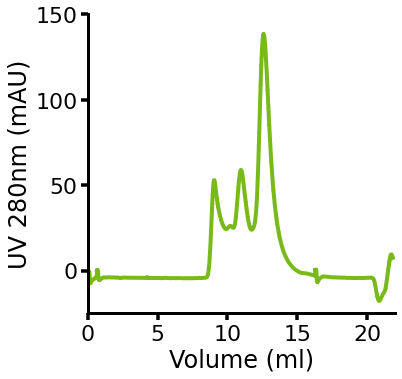

In [76]:
fig, ax = plt.subplots(1,1,figsize=(5.5,5.5))
ax.plot(x, y,color = green, lw=4);

ax.set_xlim(0,22)
ax.set_ylim(-25,150)
ax.set_xlabel('Volume (ml)')
ax.set_xticks(np.arange(0, 22.1, 5))
ax.set_yticks(np.arange(0, 150.1, 50))
ax.set_ylabel('UV 280nm (mAU)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend(('DCX-R178L-HUGS',' '),loc='upper right')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(mydir/('SEC_trace_DCX-WT-HUGS_'+date_today+'.svg'))

In [65]:
monomer = UVdata.loc[(UVdata['UV2 (280 nm)_volume'] >= 12 ) & (UVdata['UV2 (280 nm)_volume'] <= 13.25 )]
intmonomer = sum(UVdata[])

,UV2 (280 nm)_volume,UV2 (280 nm)_mAU
5552,12.001069,29.890001
5553,12.003235,30.056000
5554,12.005403,30.220000
5555,12.007568,30.393999
5556,12.009736,30.572999
...,...,...
6124,13.240533,52.310999
6125,13.242701,52.051000
6126,13.244866,52.051000
6127,13.247033,51.793002


### Import AKTA csv ###

In [63]:
askSECcsv = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
mydir = Path(askSECcsv).parent

In [64]:
SECcsv = pd.read_csv(askSECcsv, encoding='utf-8',header=2, delimiter='\t')
SECcsv

,ml,mAU,ml.1,mS/cm,ml.2,%B,ml.3,MPa,ml.4,ml/min,ml.5,(Fractions)
0,0.000,-1.310000,0.000,21.249000,0.000,0.000000,0.000,0.000000,0.000,0.000000,0.870,"""F2"""
1,0.026,-1.363000,0.029,21.249000,0.035,100.000000,0.029,0.070000,0.029,0.700000,9.030,"""A1"""
2,0.051,-1.371000,0.058,21.249000,0.070,100.000000,0.058,0.080000,0.058,0.700000,9.230,"""A2"""
3,0.077,-1.439000,0.087,21.250000,0.105,100.000000,0.087,0.100000,0.087,0.700000,9.430,"""A3"""
4,0.103,-1.446000,0.116,21.250000,0.140,100.000000,0.116,0.120000,0.116,0.700000,9.630,"""A4"""
...,...,...,...,...,...,...,...,...,...,...,...,...
972,24.908,-0.184000,,,,,,,,,,
973,24.933,-0.144000,,,,,,,,,,
974,24.959,-0.191000,,,,,,,,,,
975,24.984,-0.224000,,,,,,,,,,


In [65]:
UVdata = SECcsv[['ml',' mAU']]
x = SECcsv['ml'].values
y = SECcsv[' mAU'].values

In [66]:
X = [float(i.strip()) for i in x[:-1]]
Y = [float(i.strip()) for i in y[:-1]]

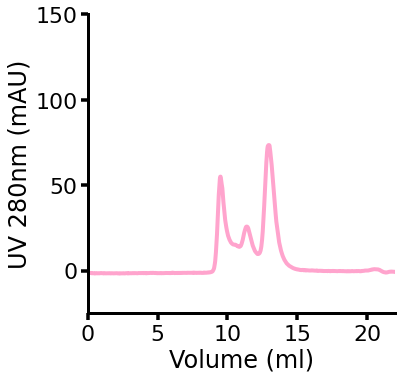

In [68]:
fig, ax = plt.subplots(1,1,figsize=(5.5,5.5))
ax.plot(X, Y,color = pink, lw=4);

ax.set_xlim(0,22)
ax.set_ylim(-25,150)
ax.set_xlabel('Volume (ml)')
ax.set_xticks(np.arange(0, 22.1, 5))
ax.set_yticks(np.arange(0, 150.1, 50))
ax.set_ylabel('UV 280nm (mAU)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend(('DCX-R178L-HUGS',' '),loc='upper right')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(mydir/('SEC_trace_DCX-R89G-HUGS_'+date_today+'.svg'))